# Training of a Feed Forward Neural Network for Classification with Tensorflow:

Credit Data obtained from the University of California Irvine Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/South+German+Credit

FILES REQUIRED: Upload a credit.xlsx file to the directory.

FILES GENERATED: The .h5 (parameters of the NN) and the .json (structure of the NN), and a .pkl file with input data for a request to submit through the API.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sn

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import  train_test_split

import tensorflow as tf

In [2]:
# Get the raw data:
raw_data = pd.read_excel("credit.xlsx", engine='openpyxl', header=None)
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [3]:
# Select the X matrix (input data), and the y vector (output data):
X = raw_data.values[1:,:20].astype('float32')
y = raw_data.values[1:,20].astype('float32')
#y = raw_data["resistance"].values[1:].astype("float32")

In [4]:
# Let us print their shape:
print(" Shape of X: ", X.shape)
print(" Shape of y: ", y.shape)

 Shape of X:  (999, 20)
 Shape of y:  (999,)


In [5]:
# Balancing the data:

# We only have two categories:
filter_y_0 = y == 0.0
filter_y_1 = y == 1.0

y_class_0 = y[filter_y_0]
y_class_1 = y[filter_y_1]

X_class_0 = X[filter_y_0,:]
X_class_1 = X[filter_y_1,:]

# Get the number of instances of the smallest category:
min_cat = np.min( [len(y_class_0), len(y_class_1)] )

In [6]:
# Balancing:
bal_y = np.concatenate( (y_class_0[:min_cat], y_class_1[:min_cat]), axis=0 )
bal_X = np.concatenate( (X_class_0[:min_cat,:], X_class_1[:min_cat,:]), axis=0)

In [7]:
# Separate in training and validation:
X_train, X_valid, y_train, y_valid = train_test_split(bal_X, bal_y,test_size=0.2,random_state=79)

# Scale the data with the information of the training set:
scaler = MinMaxScaler()
scaler.fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_valid = scaler.transform(X_valid)

In [8]:
# Create the model:
user_model = tf.keras.Sequential([
             tf.keras.layers.Dense(300, activation='relu'),
             tf.keras.layers.Dropout(.2),
             tf.keras.layers.Dense(300, activation='relu'),
             tf.keras.layers.Dropout(.2),
             tf.keras.layers.Dense(20, activation='relu'),
             tf.keras.layers.Dense(1, activation="sigmoid")
            ])

In [9]:
# Compile the user_model, choose the loss and the optimizer method:
user_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                   loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [10]:
# Number of epochs:
E=200

In [11]:
# Train the Neural Network, store the history of the training:
history = user_model.fit(Xs_train, y_train, epochs=E,
                    validation_data=(Xs_valid, y_valid),
                    verbose=1)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 6s 140ms/step - loss: 0.6952 - accuracy: 0.4979 - val_loss: 0.6974 - val_accuracy: 0.4667
Epoch 2/200
15/15 [==============================] - 0s 27ms/step - loss: 0.6971 - accuracy: 0.4812 - val_loss: 0.6966 - val_accuracy: 0.4750
Epoch 3/200
15/15 [==============================] - 0s 20ms/step - loss: 0.6950 - accuracy: 0.5000 - val_loss: 0.6959 - val_accuracy: 0.4833
Epoch 4/200
15/15 [==============================] - 0s 22ms/step - loss: 0.6917 - accuracy: 0.5396 - val_loss: 0.6950 - val_accuracy: 0.4583
Epoch 5/200
15/15 [==============================] - 0s 14ms/step - loss: 0.6936 - accuracy: 0.4896 - val_loss: 0.6941 - val_accuracy: 0.4667
Epoch 6/200
15/15 [==============================] - 0s 22ms/step - loss: 0.6929 - accuracy: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.4917
Epoch 7/200
15/15 [==============================] - 0s 17ms/step - loss: 0.6899 - accuracy: 0.5250 - val_loss: 0.6924 - val_accuracy: 0.4917
Epoch 8/200
15/15

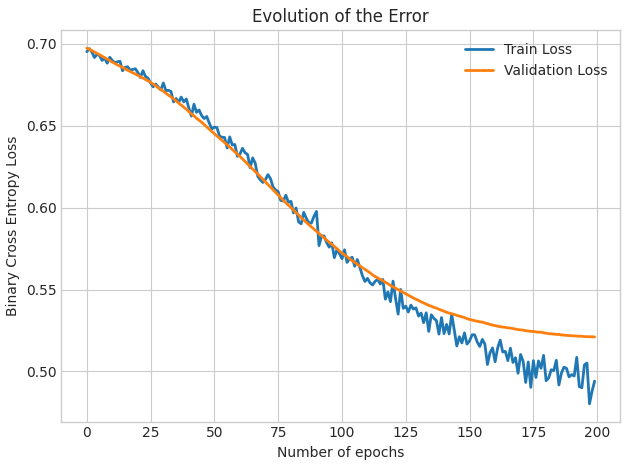

In [12]:
# Plot the evolution of the learning:
with plt.style.context(('seaborn-whitegrid')):
    fig, ax = plt.subplots()

    ax.plot(history.history['loss'], linewidth=2, label='Train Loss')
    ax.plot(history.history['val_loss'], linewidth=2, label='Validation Loss')
    ax.legend()

    ax.set_xlabel('Number of epochs')
    ax.set_ylabel('Binary Cross Entropy Loss')
    plt.title('Evolution of the Error')

    plt.tight_layout()
plt.show()

In [13]:
# Predict with the user_model for the training set:
y_train_pred_NN = user_model.predict(Xs_train).flatten()

# Get the metrics:
tr_bcl = np.mean(tf.keras.metrics.binary_crossentropy( y_train, y_train_pred_NN, from_logits=True ))
print(f"For training: Binacry Cross Entropy: {tr_bcl}")

# Predict with the user_model for the validation set:
y_valid_pred_NN = user_model.predict(Xs_valid).flatten()

# Get the metrics:
vl_bcl = np.mean(tf.keras.metrics.binary_crossentropy( y_valid, y_valid_pred_NN, from_logits=True ))
print(f"For validation: Binacry Cross Entropy: {vl_bcl}")

15/15 [==============================] - 0s 2ms/step
For training: Binacry Cross Entropy: 0.6515635251998901
4/4 [==============================] - 0s 5ms/step
For validation: Binacry Cross Entropy: 0.649994432926178


In [14]:
# Convert the predictions to labels:
label_y_train_pred_NN = np.round(y_train_pred_NN)
label_y_valid_pred_NN = np.round(y_valid_pred_NN)

In [15]:
cm_train = tf.math.confusion_matrix(label_y_train_pred_NN, y_train)
cm_valid = tf.math.confusion_matrix(label_y_valid_pred_NN, y_valid)

Text(0.5, 23.52222222222222, 'True Label')

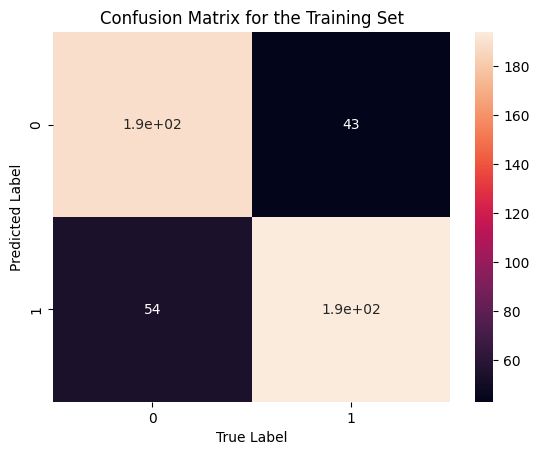

In [16]:
# For the Validation:
sn.heatmap(cm_train, annot=True)
plt.title('Confusion Matrix for the Training Set')
plt.ylabel('Predicted Label')
plt.xlabel('True Label')

Text(0.5, 23.52222222222222, 'True Label')

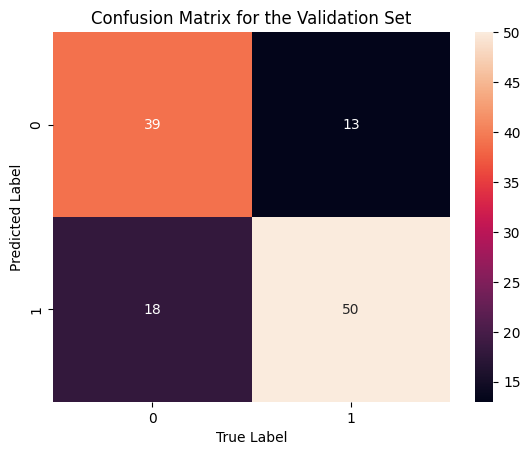

In [17]:
# For the Validation:
sn.heatmap(cm_valid, annot=True)
plt.title('Confusion Matrix for the Validation Set')
plt.ylabel('Predicted Label')
plt.xlabel('True Label')

# Save Model

In [18]:
# Serialize the user_model to JSON
user_model_in_json = user_model.to_json()
with open("user_model_structure.json", "w") as json_file:
    json_file.write(user_model_in_json)

# Serialize weights and biases to HDF5
user_model.save_weights("user_model_parameters.h5")

# Save the Data to Simulate a Future Request from the User

In [19]:
# We will simply use the Xs of the validation set for a future request:
df = pd.DataFrame(Xs_valid, index=None, columns=None)
df.to_csv('input_data_for_the_request.csv', index=True, columns=None)